In [37]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../Jalnan.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [18]:
df = pd.read_csv('../csv-data/basketball_stat.csv', encoding='utf-8')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


Text(0.5, 1, 'STl and 2P in plane')

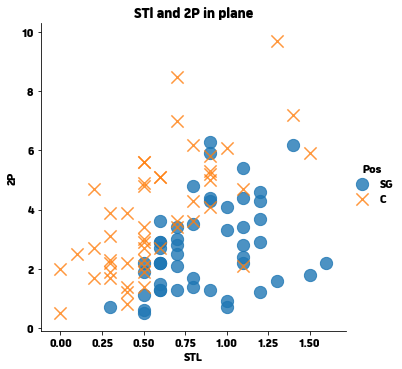

In [20]:
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
          scatter_kws={'s': 150}, # 좌표 상의 점의 크기
          markers=["o", "x"],
          hue='Pos') # 예측값
plt.title("STl and 2P in plane")

Text(0.5, 1, 'AST and 2P')

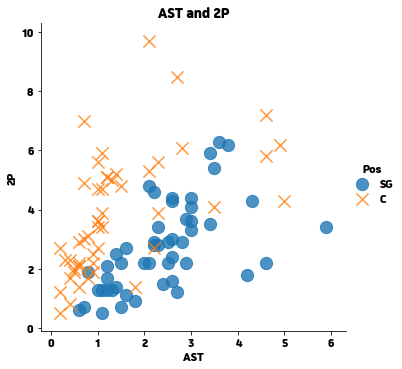

In [21]:
sns.lmplot('AST', '2P', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('AST and 2P')

Text(0.5, 1, '3P and BLK')

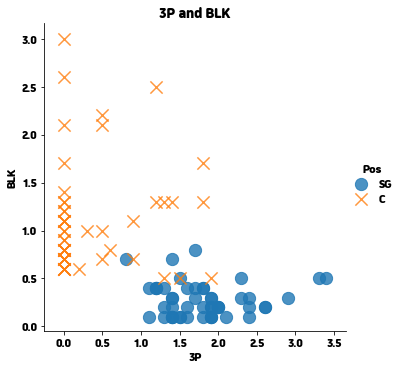

In [22]:
sns.lmplot('3P', 'BLK', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('3P and BLK')

In [23]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [24]:
df.drop(['2P',  'AST', 'STL'], axis=1, inplace=True)

In [25]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [26]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


## train, test split

In [52]:
# train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

X_train, X_test, y_train, y_test = train_test_split(
                                df.iloc[:,2:], # 문제(설명변수 3개, 2~끝)
                                df.iloc[:,1], # 정답(종속변수 1개, target, 인덱스1)
                                test_size=0.2, # 테스트 비율
                                random_state=42 # 랜덤 시드값
)

In [53]:
df.shape

(100, 5)

In [54]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [55]:
df.values[:3]

array([['Alex Abrines', 'SG', 1.4, 1.3, 0.1],
       ['Steven Adams', 'C', 0.0, 7.7, 1.0],
       ['Alexis Ajinca', 'C', 0.0, 4.5, 0.6]], dtype=object)

In [56]:
X_train.shape, y_train.shape

((80, 3), (80,))

In [57]:
X_test.shape, y_test.shape

((20, 3), (20,))

## 모델 선정 => cross-valication<br>knn, svm, decison tree

In [58]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [59]:
model_list

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best')]

In [100]:
def print_cv(model, train, test, k):
    scores = cross_val_score(model, train, test, cv = k)
    print('-----------교차검증(cv) 결과----------')
    print(scores)
    mean_scores = np.mean(scores)
    print('-----------교차검증(cv) 평균----------')
    print(mean_scores)
    return scores, mean_scores 
# 함수의 결과로 여러개의 데이터를 return할 수 있다.
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)    

In [101]:
# cv_result = print_cv() # cv_result는 tuple이 저장, (scores, mean_scores)
# index_0 = cv_result[0]
# index_1 = cv_result[1]

In [102]:
# index_0, index_1 = print_cv()

In [103]:
# k = 5 전체 교차검증하는 횟수
# model_n : 3, k=5, total_n : 15

In [105]:
model_names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
sc_list = []
mean_sc_list = []
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, y_train, 5)
    sc_list.append(sc)
    mean_sc_list.append(mean_sc)
print('\n ***************************************')
print('----- 전체 모델 리스트 -----')
print(model_names)
print('-----전체 모델의 교차 검증 결과 목록-----')
print(sc_list)
print('-----전체 모델의 교차 검증 결과 평균-----')
print(mean_sc_list)

-----------교차검증(cv) 결과----------
[0.9375 0.8125 0.8125 0.875  1.    ]
-----------교차검증(cv) 평균----------
0.8875
-----------교차검증(cv) 결과----------
[0.9375 0.875  0.9375 0.9375 1.    ]
-----------교차검증(cv) 평균----------
0.9375
-----------교차검증(cv) 결과----------
[0.9375 1.     0.875  0.9375 1.    ]
-----------교차검증(cv) 평균----------
0.95

 ***************************************
----- 전체 모델 리스트 -----
['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
-----전체 모델의 교차 검증 결과 목록-----
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.9375, 0.875 , 0.9375, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.9375, 1.    ])]
-----전체 모델의 교차 검증 결과 평균-----
[0.8875, 0.9375, 0.95]


## 시각화 해서 비교

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.8875 , 0.89375, 0.9    , 0.90625, 0.9125 , 0.91875, 0.925  ,
        0.93125, 0.9375 , 0.94375, 0.95   ]),
 <a list of 10 Patch objects>)

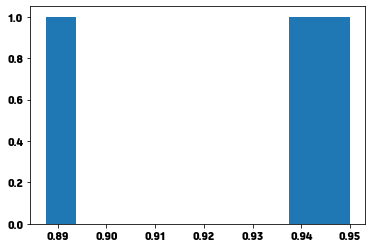

In [106]:
plt.hist(mean_sc_list)

### 교차검증 결과 Decision Tree를 사용해서 테스트 해보기로 결정

## 하이퍼 파라메터 => grid search

In [128]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    # gs_model은 최적의 파라메터가 적용된 모델의 객체
    gs_model.fit(X_train, y_train)
    print(gs_model.best_estimator_) # 최적의 파라메터가 적용된 모델 객체
    print(gs_model.best_score_) # 최적의 파라메터가 적용된 모델로 학습한 정확도 결과(accuracy)
    print(gs_model.best_params_) # grid_search를 통해 찾은 최적의 모델
    print(gs_model) # grid_search 객체

In [125]:
params = {# 하이퍼파라메터 절정으로 가질 수 있는 모든 경우의 수=> 4 * 3 * 2 : 25
    'max_depth':[3,5,7,10], # keu : 하이퍼라라메터명, yalues는 list타입이어야 한다.
    'random_state': [1,3,5],
    'criterion':['gini', 'entropy'] # 혼란스러운 정도(분류의 정도)를 계산하는 기준
}

In [126]:
# 함수의 모든 파라메터를 보고 싶으면 함수명 쓰고 shift_tab
grid_search

<function __main__.grid_search(model, params, k)>

###  [ Decision Tree parameters ]
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [130]:
grid_search(dt, params, 5) # grid_search의 모든 경우의 수는 24 * 5

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
0.95
{'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,


### 그리드 서치를 통해서 찾은 최적의 파라메터는 <br>{'criterion': 'gini', 'max_depth': 3, 'random_state': 1}

## 최적의 하이퍼 파라메터로 모델 객체 생성<br>fit()

In [132]:
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## 테스트 데이터로 검증

In [143]:
def test_validation(model, X_test, y_test) :
    predict_result = model.predict(X_test)
    acc = accuracy_score(y_test, predict_result)
    print('accuracy >> ', acc)
    cf = confusion_matrix(y_test, predict_result)
    # 실제(c) --> 예측(c, sg), 실제(sg) --> 예측(sg, c)
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지
    # 4가지를 표 형태로 정리해주는 것이 confusion_matrix
    # 첫번째 행.열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정된다.
    print('confusion matrix >>\n', cf)
    # confusion maxtrix는 binary classfication인 경우에는 보기가 괜찮으나,
    # multi class classification인 경우에는 보기가 힘들다.
    # confusion matrix를 가독성 좋게 볼 수 있는 것이 classification_report
    c_report = classification_report(y_test, predict_result)
    print('classification report >>\n', c_report)


In [144]:
y_test.value_counts()

C     10
SG    10
Name: Pos, dtype: int64

In [145]:
test_validation(dt_gs, X_test, y_test)

accuracy >>  0.95
confusion matrix >>
 [[10  0]
 [ 1  9]]
classification report >>
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



### c는 10개를 다 맞춤. sg는 9개 맞추고, 1개를 c로 예측함(틀림)<br>정확도가 95%가 나왔음<br>acc = 10 + 0 / 10 + 9 + 1<br>정확도 = 실제C:예측C + 실제SG:실제SG /<br> 실제C:예측C + 실제SG:실제SG + 실제C:예측SG + 실제SG예측 C

# recall
## 실제 C(10개)중에서, 예측한 값들을 보면 실제 C로 100% 정확하게 예측해냈고, SG로 예측한 것은 없다.
## 실제 SG(10개)중에서, 예측한 값들을 보면 실제 SG로 예측한 것이 90%이고, C로 예측한 것이 10%이다.

# precision
## 예측한 C(11)중에서 실제 91%가 C였고, SG는 9%이다.
## 예측한 SG중에서 실제 100%가 SG였고, C는 없었다.

## 정확도 체크, acc recall, precision, f1-score<br>confusion maxtrix(혼동행렬)